# Import Modules

We will need some basic packages, but will also need to import different AutoRA theorists. Here, we will import two theorists: Differentiable Architecture Search, and Logistic Regression.

Note that we are currently re-structuring the AutoRA package so that all experimentalists and theorists are their own sub-package. As such, once this is complete for the theorists, these imports should be modified to conform to the new structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autora.theorist.darts import DARTSRegressor; DARTSRegressor()
from autora.experimentalist.leverage import leverage_sample

c:\Users\cwill\GitHub\virtualEnvs\autoraEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define Meta-Space

We will here define X values of interest as well as a ground truth model to derive y values.

In [2]:
#Define X with some noise
X = np.linspace(start=-3, stop=6, num=25).reshape(-1, 1)
noise = np.array([np.random.normal(0,.5) for r in range(len(X))]).reshape(-1,1)
X = X + noise
X.reshape(-1).sort(kind='mergesort')

#Define ground truth model
def ground_truth(xs):
    y = (xs ** 2.0)
    y[xs < 0] = 0
    return y

# Plot the Data

Let's plot the data to see what we are working with.

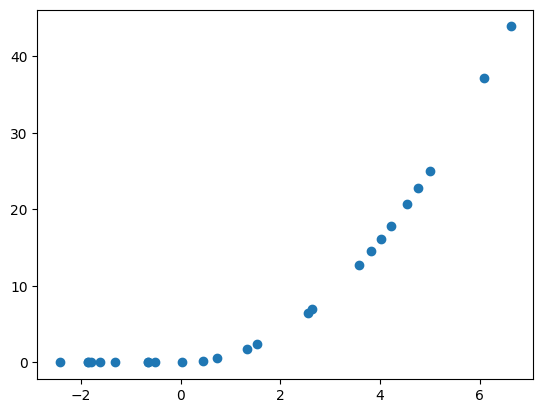

In [3]:
plt.plot(X, ground_truth(X), 'o')
plt.show()

# Define and Fit Theorists

Next, we initialize each theorist and then train them on the data. 

Note that this can take quite some time, especially for the BSR Theorist.

In [4]:
%%capture

#Initiate theorists
darts_theorist = DARTSRegressor()

#Fit theorists
darts_theorist.fit(X,ground_truth(X))

# Plot Theorists on Data

We can then plot each theorist to see how well it recovered the data.

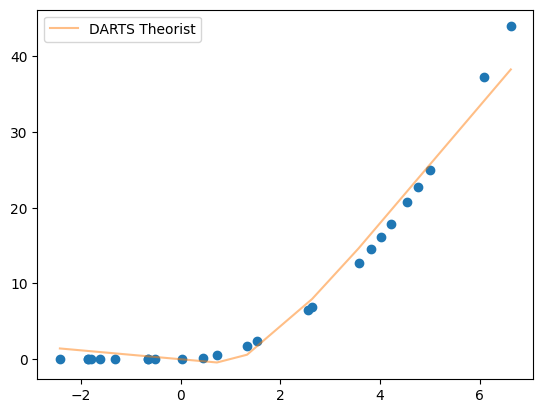

In [5]:
plt.plot(X, ground_truth(X), 'o')
plt.plot(X, darts_theorist.predict(X), alpha = .5, label = 'DARTS Theorist')
plt.legend()
plt.show()

# Run and Leverage Samples

Now we will get a proposal from the experimentalist as to which datapoints to investigate next. We will retrieve 5 new datapoints in this example.

In [6]:
sampler_proposal = leverage_sample(X, ground_truth(X.ravel()), [darts_theorist], fit = 'both', num_samples = 20, sd=.2)

print('New datapoints:\n' + str(sampler_proposal))

100%|██████████| 10/10 [00:00<00:00, 40.72it/s]


New datapoints:
[ 6.18792719  5.96283934  4.633869    3.84763567  4.82674401  4.59135445
  4.76708069  3.9679931   3.79749211  1.757101    1.10698697 -2.61861738
  0.09606576 -1.86401331 -1.95060694 -1.98708113  2.46632564  0.52127864
 -1.3902743   2.39894227]


# Plot New Datapoints With Old

We can then plot our new datapoints with our previous ones to demonstrate our new dataset of investigation for then next cycle.

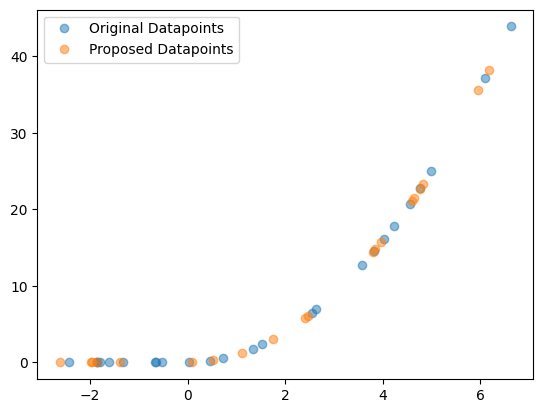

In [7]:
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
plt.plot(sampler_proposal, ground_truth(sampler_proposal), 'o', alpha = .5, label = 'Proposed Datapoints')
plt.legend()
plt.show()

# Plot Data with New Models

We will now refit our models with the new, extended, dataset to see if it looks any better

100%|██████████| 10/10 [00:00<00:00, 39.17it/s]


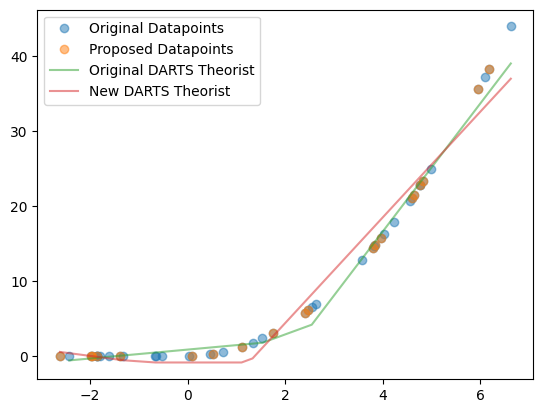

In [8]:
#Create new independent variable
original_X = X
X = np.concatenate((X, sampler_proposal.reshape(-1,1)))
X.reshape(-1).sort(kind='mergesort')

#Refit models
original_darts_theorist = DARTSRegressor()
darts_theorist = DARTSRegressor()
original_darts_theorist.fit(original_X,ground_truth(original_X))
darts_theorist.fit(X,ground_truth(X))

#Plot data and models
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
plt.plot(sampler_proposal, ground_truth(sampler_proposal), 'o', alpha = .5, label = 'Proposed Datapoints')
plt.plot(original_X, original_darts_theorist.predict(original_X), alpha = .5, label = 'Original DARTS Theorist')
plt.plot(X, darts_theorist.predict(X), alpha = .5, label = 'New DARTS Theorist')
plt.legend()
plt.show()